In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

C:\Users\Dell\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("HW4Data.csv")
n= df.shape[0]
x = df['Days'].to_numpy()
y = df['Corn_NDVI_2013'].to_numpy()
y2 = df['Cotton_NDVI_2013'].to_numpy()
df.head(5)

,Days,Corn_NDVI_2013,Cotton_NDVI_2013,Soybean_NDVI_2013,Corn_NDVI_2014,Cotton_NDVI_2014,Soybean_NDVI_2014,Corn_MSAVI_2013,Cotton_MSAVI_2013,Soybean_MSAVI_2013,Corn_MSAVI_2014,Cotton_MSAVI_2014,Soybean_MSAVI_2014
0,116,0.621638,0.182465,0.710824,0.548149,0.200251,0.665377,0.763500,0.307711,0.820558,0.702741,0.330965,0.763316
1,117,0.639923,0.183393,0.690518,0.554911,0.201925,0.634771,0.776259,0.308948,0.804358,0.707755,0.332663,0.734997
2,118,0.658207,0.184321,0.670212,0.561673,0.203599,0.604165,0.789019,0.310186,0.788159,0.712769,0.334361,0.706678
3,119,0.676491,0.185248,0.649907,0.568434,0.205272,0.573559,0.801779,0.311423,0.771959,0.717782,0.336059,0.678359
4,120,0.694776,0.186176,0.629601,0.575196,0.206946,0.542953,0.814539,0.312660,0.755760,0.722796,0.337757,0.650040


In [3]:
def calculateMSE(y,y_bar,):
    summation = 0  #variable to store the summation of differences
    n = len(y) #finding total number of items in list
    for i in range (0,n):  #looping through each element of the list
      difference = y[i] - y_bar[i]  #finding the difference between observed and predicted value
      squared_difference = difference**2  #taking square of the differene 
      summation = summation + squared_difference  #taking a sum of all the differences
    MSE = summation/n  #dividing summation by total values to obtain average
    print ("The Mean Square Error is: " , MSE)
    return MSE;

 # Plotting generated dataset for Corn_NDVI_2013 and Cotton_NDVI_2013

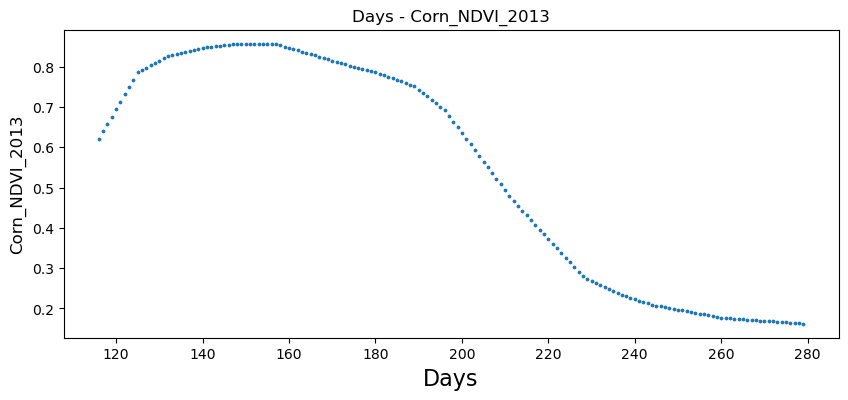

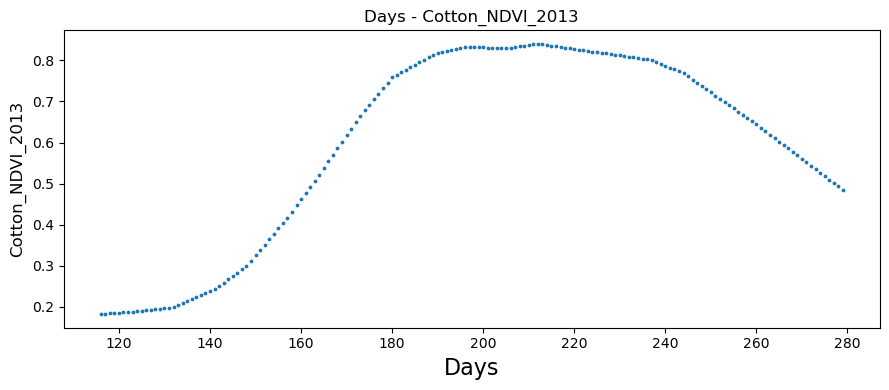

In [4]:

plt.figure(1,figsize=(10, 4))
plt.scatter(x, y, s = 3)
plt.title('Days - Corn_NDVI_2013')
plt.xlabel('Days', fontsize=16)
plt.ylabel('Corn_NDVI_2013', fontsize=12)

plt.figure(2,figsize=(9, 4))
plt.scatter(x, y2, s = 3)
plt.title('Days - Cotton_NDVI_2013')
plt.xlabel('Days', fontsize=16)
plt.ylabel('Cotton_NDVI_2013', fontsize=12)
plt.tight_layout()
plt.show()

## WHY USE POLYNOMIAL REGRESSION

What if your data is actually more complex than a simple straight line? Surprisingly,
you can actually use a linear model to fit nonlinear data. A simple way to do this is to
add powers of each feature as new features, then train a linear model on this extended
set of features. This technique is called Polynomial Regression.

# 1.1) Polynomial regression without Scikit-learn: A manual approach

Below lines maps x to higher dimension. Equals to PolynomialFeatures(2), degree = 2  

In [4]:
x1 = x;
x2 = x**2

Lets do Linear Regression on x1 & x2 (in mapped higher dimension space)

In [5]:
X = np.column_stack((x1,x2))
X_b = np.c_[np.ones((n, 1)), X]
X_b

array([[1.0000e+00, 1.1600e+02, 1.3456e+04],
       [1.0000e+00, 1.1700e+02, 1.3689e+04],
       [1.0000e+00, 1.1800e+02, 1.3924e+04],
       [1.0000e+00, 1.1900e+02, 1.4161e+04],
       [1.0000e+00, 1.2000e+02, 1.4400e+04],
       [1.0000e+00, 1.2100e+02, 1.4641e+04],
       [1.0000e+00, 1.2200e+02, 1.4884e+04],
       [1.0000e+00, 1.2300e+02, 1.5129e+04],
       [1.0000e+00, 1.2400e+02, 1.5376e+04],
       [1.0000e+00, 1.2500e+02, 1.5625e+04],
       [1.0000e+00, 1.2600e+02, 1.5876e+04],
       [1.0000e+00, 1.2700e+02, 1.6129e+04],
       [1.0000e+00, 1.2800e+02, 1.6384e+04],
       [1.0000e+00, 1.2900e+02, 1.6641e+04],
       [1.0000e+00, 1.3000e+02, 1.6900e+04],
       [1.0000e+00, 1.3100e+02, 1.7161e+04],
       [1.0000e+00, 1.3200e+02, 1.7424e+04],
       [1.0000e+00, 1.3300e+02, 1.7689e+04],
       [1.0000e+00, 1.3400e+02, 1.7956e+04],
       [1.0000e+00, 1.3500e+02, 1.8225e+04],
       [1.0000e+00, 1.3600e+02, 1.8496e+04],
       [1.0000e+00, 1.3700e+02, 1.8769e+04],
       [1.

In [6]:
w_estimate_corn = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
w_estimate_cotton = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y2)
print('[beta0, beta1, beta2] = ', w_estimate_corn)

[beta0, beta1, beta2] =  [ 4.49682972e-01  7.01424199e-03 -3.12056475e-05]


In [7]:
y_hat = X_b.dot(w_estimate_corn) #corn
y_hat2 = X_b.dot(w_estimate_cotton) #cotton
y_hat

array([ 0.84343185,  0.84317518,  0.84285609,  0.8424746 ,  0.84203069,
        0.84152437,  0.84095564,  0.8403245 ,  0.83963094,  0.83887498,
        0.8380566 ,  0.83717582,  0.83623262,  0.83522701,  0.83415899,
        0.83302856,  0.83183571,  0.83058046,  0.82926279,  0.82788272,
        0.82644023,  0.82493533,  0.82336802,  0.82173829,  0.82004616,
        0.81829162,  0.81647466,  0.81459529,  0.81265351,  0.81064932,
        0.80858272,  0.80645371,  0.80426228,  0.80200845,  0.7996922 ,
        0.79731355,  0.79487248,  0.792369  ,  0.7898031 ,  0.7871748 ,
        0.78448409,  0.78173096,  0.77891542,  0.77603748,  0.77309712,
        0.77009434,  0.76702916,  0.76390157,  0.76071156,  0.75745915,
        0.75414432,  0.75076708,  0.74732743,  0.74382537,  0.7402609 ,
        0.73663402,  0.73294472,  0.72919301,  0.7253789 ,  0.72150237,
        0.71756343,  0.71356208,  0.70949831,  0.70537214,  0.70118355,
        0.69693256,  0.69261915,  0.68824333,  0.6838051 ,  0.67

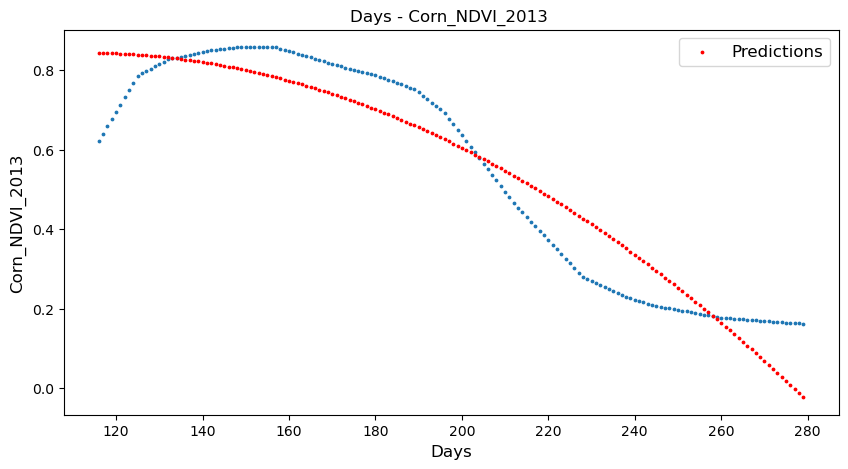

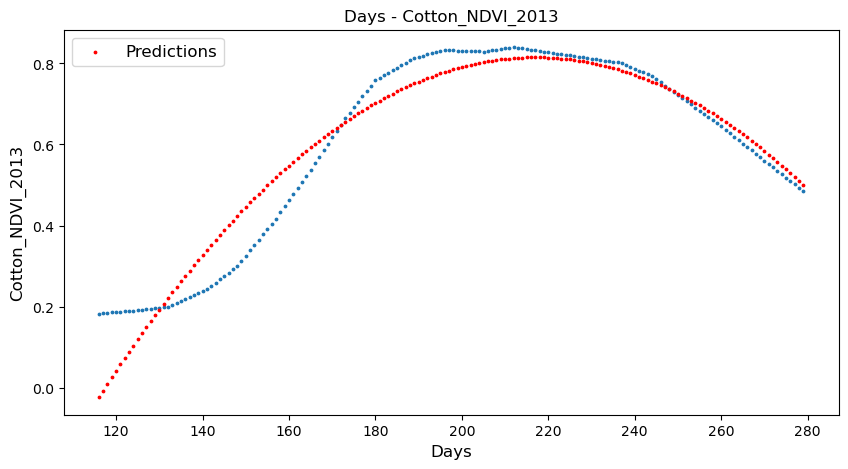

In [8]:
# plotting generated dataset
plt.figure(1,figsize=(10, 5))
plt.scatter(x, y, s = 3)
plt.scatter(x, y_hat, s = 3, color='red',label="Predictions")
plt.legend(loc="upper right", fontsize=12)
plt.title('Days - Corn_NDVI_2013 ')
plt.xlabel('Days', fontsize=12)
plt.ylabel('Corn_NDVI_2013', fontsize=12)

plt.figure(2,figsize=(10, 5))
plt.scatter(x, y2, s = 3)
plt.scatter(x, y_hat2, s = 3, color='red',label="Predictions")
plt.legend(loc="upper left", fontsize=12)
plt.title('Days - Cotton_NDVI_2013')
plt.xlabel('Days', fontsize=12)
plt.ylabel('Cotton_NDVI_2013', fontsize=12)

plt.show()

In [10]:
print("Days- Corn_NDVI_2013"), calculateMSE(y,y_hat) , print("Days -Cotton_NDVI_2013") ,calculateMSE(y2,y_hat2)

Days- Corn_NDVI_2013
The Mean Square Error is:  0.007866631184019625
Days -Cotton_NDVI_2013
The Mean Square Error is:  0.003762643930048956


(None, 0.007866631184019625, None, 0.003762643930048956)

# 1.2) Polynomial regression with Scikit-learn: A manual approach

Lets use PolynomialFeatures to create x1 and x2  (x1=x, x2=x**2), compare PolynomialFeatures result and manual approach above

In [11]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=4)
x_input = x[:,np.newaxis]
x_mapped = poly.fit_transform(x_input)
print(x_mapped)

[[1.00000000e+00 1.16000000e+02 1.34560000e+04 1.56089600e+06
  1.81063936e+08]
 [1.00000000e+00 1.17000000e+02 1.36890000e+04 1.60161300e+06
  1.87388721e+08]
 [1.00000000e+00 1.18000000e+02 1.39240000e+04 1.64303200e+06
  1.93877776e+08]
 [1.00000000e+00 1.19000000e+02 1.41610000e+04 1.68515900e+06
  2.00533921e+08]
 [1.00000000e+00 1.20000000e+02 1.44000000e+04 1.72800000e+06
  2.07360000e+08]
 [1.00000000e+00 1.21000000e+02 1.46410000e+04 1.77156100e+06
  2.14358881e+08]
 [1.00000000e+00 1.22000000e+02 1.48840000e+04 1.81584800e+06
  2.21533456e+08]
 [1.00000000e+00 1.23000000e+02 1.51290000e+04 1.86086700e+06
  2.28886641e+08]
 [1.00000000e+00 1.24000000e+02 1.53760000e+04 1.90662400e+06
  2.36421376e+08]
 [1.00000000e+00 1.25000000e+02 1.56250000e+04 1.95312500e+06
  2.44140625e+08]
 [1.00000000e+00 1.26000000e+02 1.58760000e+04 2.00037600e+06
  2.52047376e+08]
 [1.00000000e+00 1.27000000e+02 1.61290000e+04 2.04838300e+06
  2.60144641e+08]
 [1.00000000e+00 1.28000000e+02 1.638400

X_poly now contains the original feature of X plus the square of this feature. Now you
can fit a LinearRegression model to this extended training data.

In [12]:
from sklearn.linear_model import LinearRegression

regressor_corn = LinearRegression()
regressor_cotton = LinearRegression()

regressor_corn.fit(x_mapped, y)
regressor_cotton.fit(x_mapped, y2)

# Predicting values using our trained model
y_hat = regressor_corn.predict(x_mapped)
y_hat2 = regressor_cotton.predict(x_mapped)

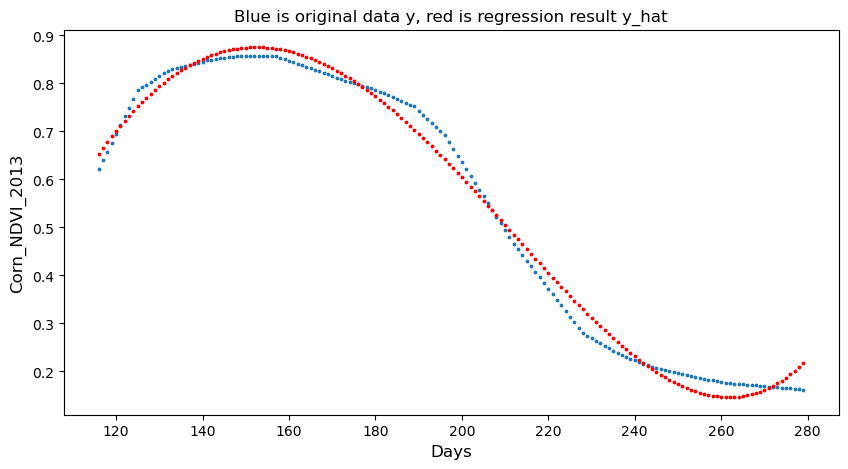

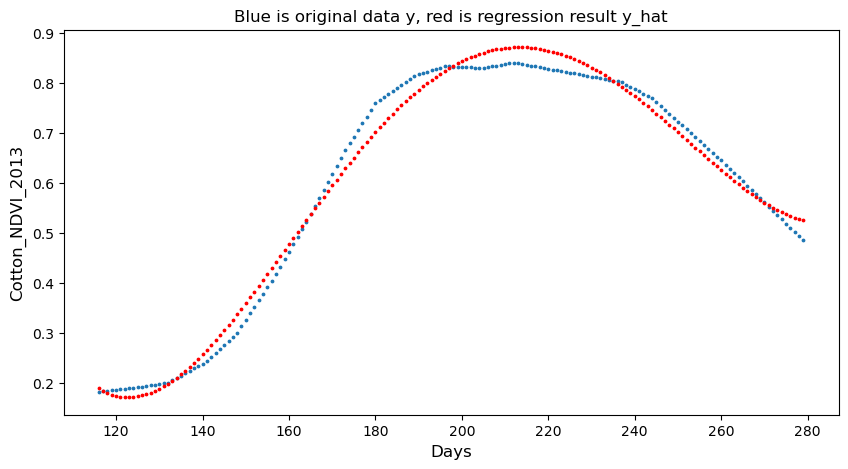

In [13]:
# plotting generated dataset
plt.figure(figsize=(10, 5))
plt.scatter(x, y, s = 3)
plt.scatter(x, y_hat, s = 3, color='red')
plt.title('Blue is original data y, red is regression result y_hat')
plt.xlabel('Days', fontsize=12)
plt.ylabel('Corn_NDVI_2013', fontsize=12)


plt.figure(figsize=(10, 5))
plt.scatter(x, y2, s = 3)
plt.scatter(x, y_hat2, s = 3, color='red')
plt.title('Blue is original data y, red is regression result y_hat')
plt.xlabel('Days', fontsize=12)
plt.ylabel('Cotton_NDVI_2013', fontsize=12)

plt.show()

In [14]:
print("Days- Corn_NDVI_2013"), calculateMSE(y,y_hat) , print("Days -Cotton_NDVI_2013") ,calculateMSE(y2,y_hat2)

Days- Corn_NDVI_2013
The Mean Square Error is:  0.0006678255673159109
Days -Cotton_NDVI_2013
The Mean Square Error is:  0.0006432693656991217


(None, 0.0006678255673159109, None, 0.0006432693656991217)

# 3) Estimate MSAVI from NDVI by using curve fitting in 2013 (MSAVI vs NDVI)

In [15]:
x = df['Corn_NDVI_2013'].to_numpy()
x2 = df['Cotton_NDVI_2013'].to_numpy()
x3 = df['Soybean_NDVI_2013'].to_numpy()

y = df['Corn_MSAVI_2013'].to_numpy()
y2 = df['Cotton_MSAVI_2013'].to_numpy()
y3 = df['Soybean_MSAVI_2013'].to_numpy()


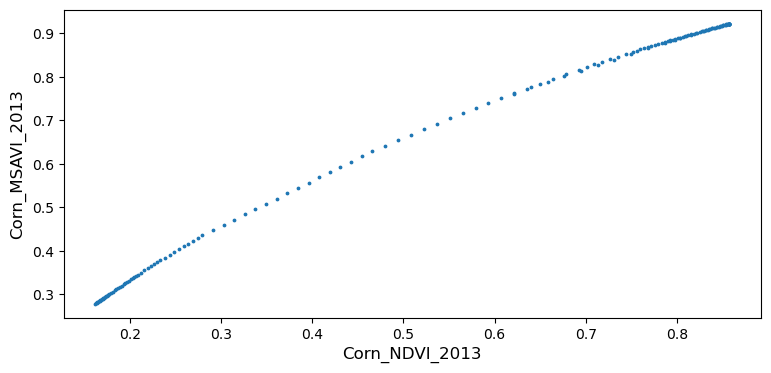

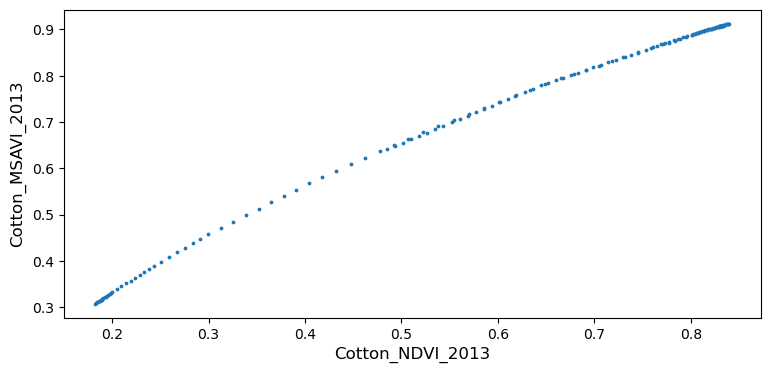

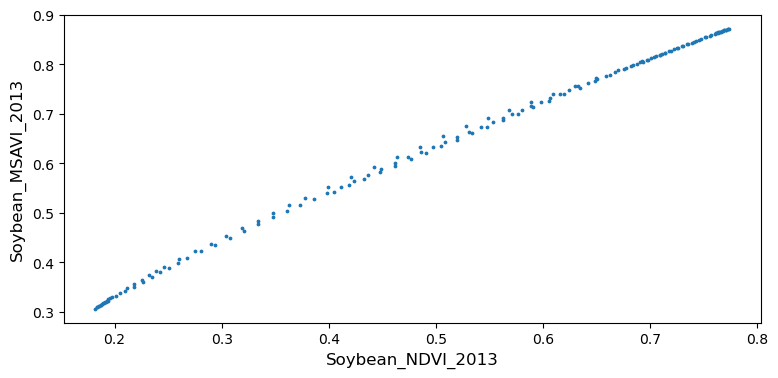

In [16]:
plt.figure(1,figsize=(9, 4))
plt.scatter(x, y, s = 3)
plt.xlabel('Corn_NDVI_2013', fontsize=12)
plt.ylabel('Corn_MSAVI_2013', fontsize=12)

plt.figure(2,figsize=(9, 4))
plt.scatter(x2, y2, s = 3)
plt.xlabel('Cotton_NDVI_2013', fontsize=12)
plt.ylabel('Cotton_MSAVI_2013', fontsize=12)

plt.figure(3,figsize=(9, 4))
plt.scatter(x3, y3, s = 3)
plt.xlabel('Soybean_NDVI_2013', fontsize=12)
plt.ylabel('Soybean_MSAVI_2013', fontsize=12)


plt.show()

## 3.1) Polynomial regression without Scikit-learn: A manual approach

In [17]:
x1_corn = x;
x2_corn = x1_corn**2
X_corn = np.column_stack((x1_corn,x2_corn))
X_b_corn = np.c_[np.ones((n, 1)), X_corn]


x1_cotton = x2;
x2_cotton = x1_cotton**2
X_cotton = np.column_stack((x1_cotton,x2_cotton))
X_b_cotton = np.c_[np.ones((n, 1)), X_cotton]


x1_soybean = x3;
x2_soybean = x1_soybean**2
X_soybean = np.column_stack((x1_soybean,x2_soybean))
X_b_soybean = np.c_[np.ones((n, 1)), X_soybean]



In [18]:
w_estimate_corn = np.linalg.inv(X_b_corn.T.dot(X_b_corn)).dot(X_b_corn.T).dot(y)
w_estimate_cotton = np.linalg.inv(X_b_cotton.T.dot(X_b_cotton)).dot(X_b_cotton.T).dot(y2)
w_estimate_soybean = np.linalg.inv(X_b_soybean.T.dot(X_b_soybean)).dot(X_b_soybean.T).dot(y3)

y_hat = X_b_corn.dot(w_estimate_corn) #corn
y_hat2 = X_b_cotton.dot(w_estimate_cotton) #cotton
y_hat3 = X_b_soybean.dot(w_estimate_soybean) #soybean

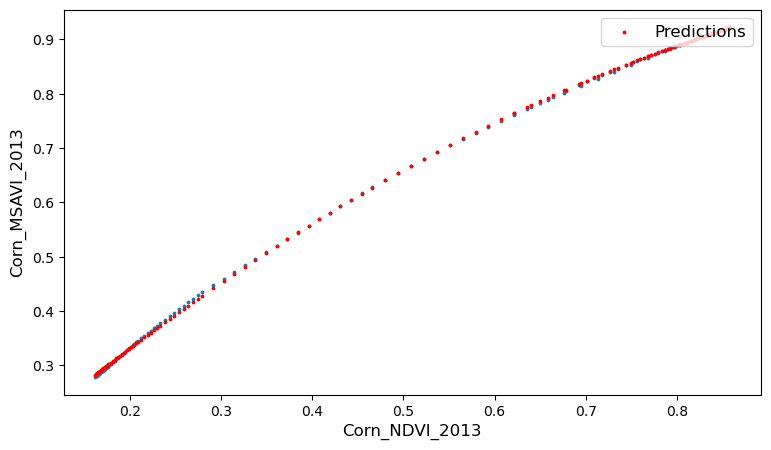

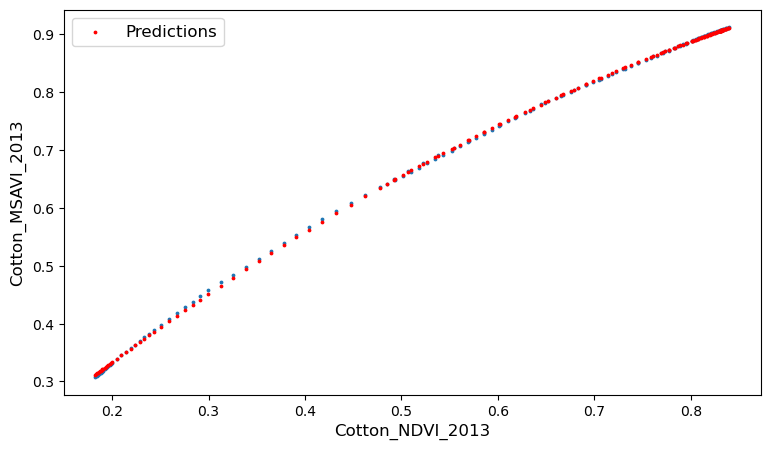

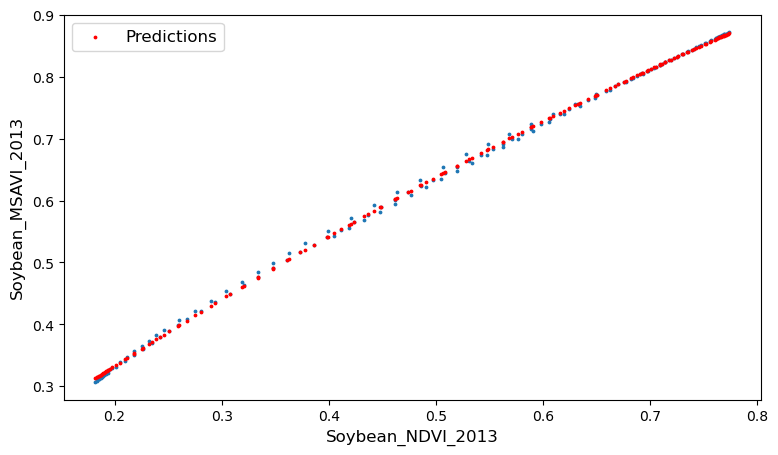

In [19]:
# plotting generated dataset
plt.figure(1,figsize=(9, 5))
plt.scatter(x, y, s = 3)
plt.scatter(x, y_hat, s = 3, color='red',label="Predictions")
plt.legend(loc="upper right", fontsize=12)
plt.xlabel('Corn_NDVI_2013', fontsize=12)
plt.ylabel('Corn_MSAVI_2013', fontsize=12)

plt.figure(2,figsize=(9, 5))
plt.scatter(x2, y2, s = 3)
plt.scatter(x2, y_hat2, s = 3, color='red',label="Predictions")
plt.legend(loc="upper left", fontsize=12)
plt.xlabel('Cotton_NDVI_2013', fontsize=12)
plt.ylabel('Cotton_MSAVI_2013', fontsize=12)

plt.figure(3,figsize=(9, 5))
plt.scatter(x3, y3, s = 3)
plt.scatter(x3, y_hat3, s = 3, color='red',label="Predictions")
plt.legend(loc="upper left", fontsize=12)
plt.xlabel('Soybean_NDVI_2013', fontsize=12)
plt.ylabel('Soybean_MSAVI_2013', fontsize=12)


plt.show()

In [21]:
#from sklearn.metrics import mean_squared_error

print("Corn_MSAVI_2013- Corn_NDVI_2013"), calculateMSE(y,y_hat),
print("Cotton_MSAVI_2013 -Cotton_NDVI_2013") ,calculateMSE(y2,y_hat2),
print("Soybean_MSAVI_2013- Soybean_NDVI_2013"), calculateMSE(y3,y_hat3) 

Corn_MSAVI_2013- Corn_NDVI_2013
The Mean Square Error is:  6.6918801830429395e-06
Cotton_MSAVI_2013 -Cotton_NDVI_2013
The Mean Square Error is:  5.358951522621538e-06
Soybean_MSAVI_2013- Soybean_NDVI_2013
The Mean Square Error is:  1.8704325982276453e-05


(None, 1.8704325982276453e-05)

# 3.2) Polynomial regression with Scikit-learn: A manual approach

In [22]:
from sklearn.preprocessing import PolynomialFeatures

poly_corn = PolynomialFeatures(degree=2)
x_input_corn = x[:,np.newaxis]
x_mapped_corn = poly_corn.fit_transform(x_input_corn)

poly_cotton = PolynomialFeatures(degree=2)
x_input_cotton = x2[:,np.newaxis]
x_mapped_cotton = poly_cotton.fit_transform(x_input_cotton)

poly_soybean = PolynomialFeatures(degree=2)
x_input_soybean = x3[:,np.newaxis]
x_mapped_soybean = poly_soybean.fit_transform(x_input_soybean)



In [23]:
from sklearn.linear_model import LinearRegression

regressor_corn = LinearRegression()
regressor_cotton = LinearRegression()
regressor_soybean = LinearRegression()

regressor_corn.fit(x_mapped_corn, y)
regressor_cotton.fit(x_mapped_cotton, y2)
regressor_soybean.fit(x_mapped_soybean, y3)

# Predicting values using our trained model
y_hat = regressor_corn.predict(x_mapped_corn)
y_hat2 = regressor_cotton.predict(x_mapped_cotton)
y_hat3 = regressor_cotton.predict(x_mapped_soybean)

Text(0, 0.5, 'Soybean_MSAVI_2013')

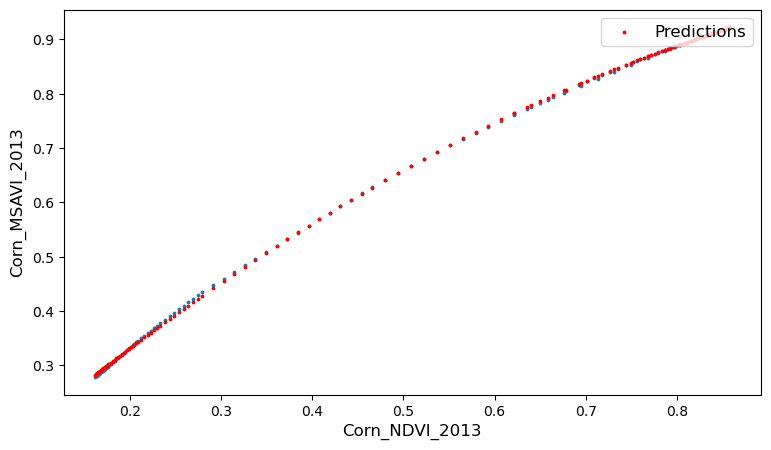

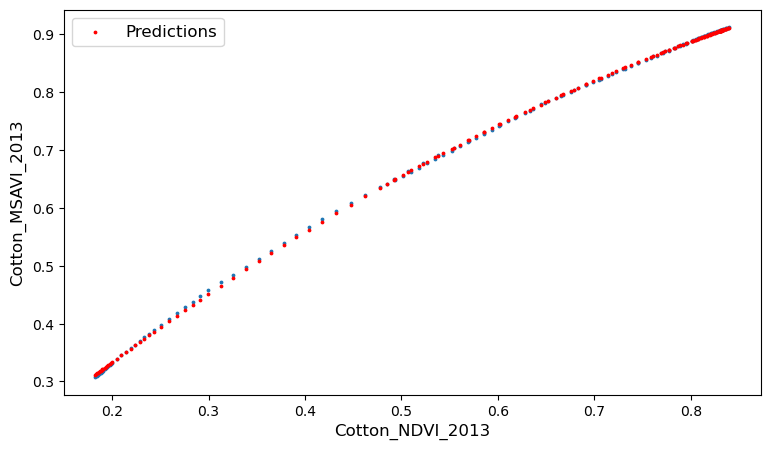

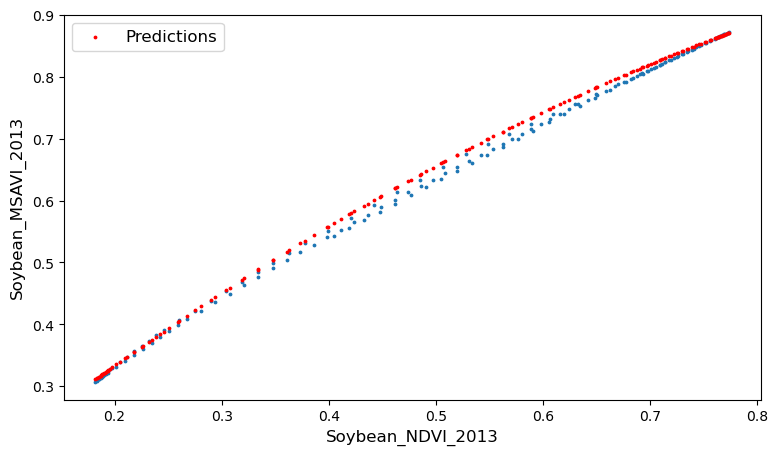

In [24]:
plt.figure(1,figsize=(9, 5))
plt.scatter(x, y, s = 3)
plt.scatter(x, y_hat, s = 3, color='red',label="Predictions")
plt.legend(loc="upper right", fontsize=12)
plt.xlabel('Corn_NDVI_2013', fontsize=12)
plt.ylabel('Corn_MSAVI_2013', fontsize=12)

plt.figure(2,figsize=(9, 5))
plt.scatter(x2, y2, s = 3)
plt.scatter(x2, y_hat2, s = 3, color='red',label="Predictions")
plt.legend(loc="upper left", fontsize=12)
plt.xlabel('Cotton_NDVI_2013', fontsize=12)
plt.ylabel('Cotton_MSAVI_2013', fontsize=12)

plt.figure(3,figsize=(9, 5))
plt.scatter(x3, y3, s = 3)
plt.scatter(x3, y_hat3, s = 3, color='red',label="Predictions")
plt.legend(loc="upper left", fontsize=12)
plt.xlabel('Soybean_NDVI_2013', fontsize=12)
plt.ylabel('Soybean_MSAVI_2013', fontsize=12)

In [25]:
print("Corn_MSAVI_2013- Corn_NDVI_2013"), calculateMSE(y,y_hat),
print("Cotton_MSAVI_2013 -Cotton_NDVI_2013") ,calculateMSE(y2,y_hat2),
print("Soybean_MSAVI_2013- Soybean_NDVI_2013"), calculateMSE(y3,y_hat3) 

Corn_MSAVI_2013- Corn_NDVI_2013
The Mean Square Error is:  6.69188018304295e-06
Cotton_MSAVI_2013 -Cotton_NDVI_2013
The Mean Square Error is:  5.358951522621537e-06
Soybean_MSAVI_2013- Soybean_NDVI_2013
The Mean Square Error is:  0.00013559432509918046


(None, 0.00013559432509918046)

## 4) Compare 2014 NDVI and MSAVI values from 2013’s NDVI curve data by using curve fitting.

In [20]:
x = df['Corn_NDVI_2013'].to_numpy()
x2 = df['Cotton_NDVI_2013'].to_numpy()
x3 = df['Soybean_NDVI_2013'].to_numpy()

y = df['Corn_MSAVI_2014'].to_numpy()
y2 = df['Cotton_MSAVI_2014'].to_numpy()
y3 = df['Soybean_MSAVI_2014'].to_numpy()

In [21]:
from sklearn.preprocessing import PolynomialFeatures

poly_corn = PolynomialFeatures(degree=4)
x_input_corn = x[:,np.newaxis]
x_mapped_corn = poly_corn.fit_transform(x_input_corn)

poly_cotton = PolynomialFeatures(degree=2)
x_input_cotton = x2[:,np.newaxis]
x_mapped_cotton = poly_cotton.fit_transform(x_input_cotton)

poly_soybean = PolynomialFeatures(degree=2)
x_input_soybean = x3[:,np.newaxis]
x_mapped_soybean = poly_soybean.fit_transform(x_input_soybean)



In [22]:
from sklearn.linear_model import LinearRegression

regressor_corn = LinearRegression()
regressor_cotton = LinearRegression()
regressor_soybean = LinearRegression()

regressor_corn.fit(x_mapped_corn, y)
regressor_cotton.fit(x_mapped_cotton, y2)
regressor_soybean.fit(x_mapped_soybean, y3)

# Predicting values using our trained model
y_hat = regressor_corn.predict(x_mapped_corn)
y_hat2 = regressor_cotton.predict(x_mapped_cotton)
y_hat3 = regressor_cotton.predict(x_mapped_soybean)

Text(0, 0.5, 'Soybean_MSAVI_2014')

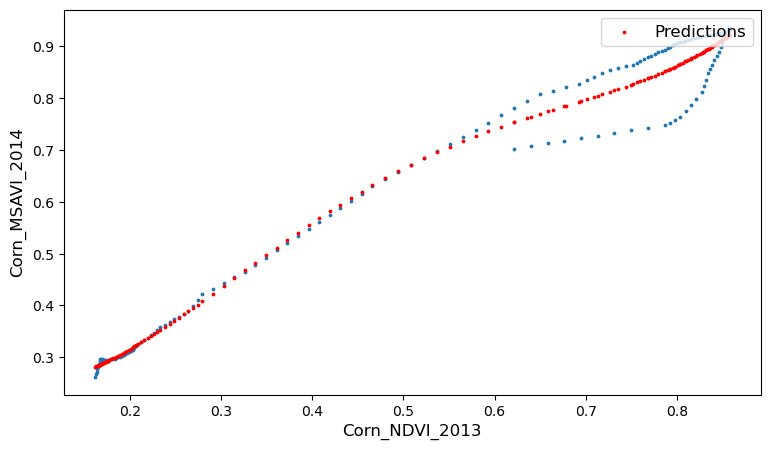

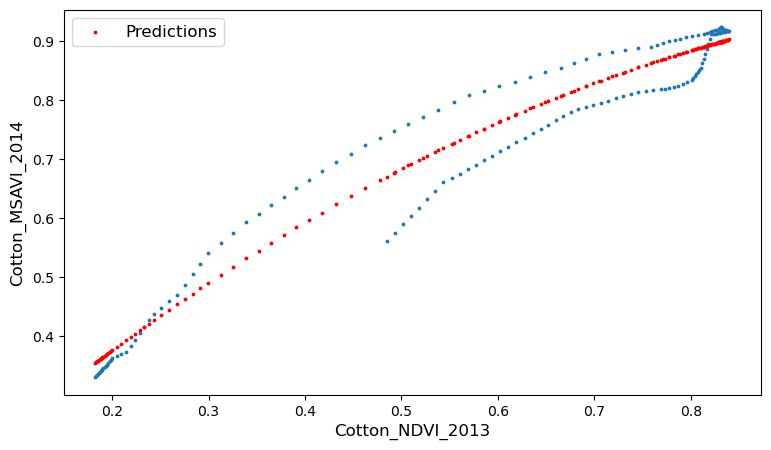

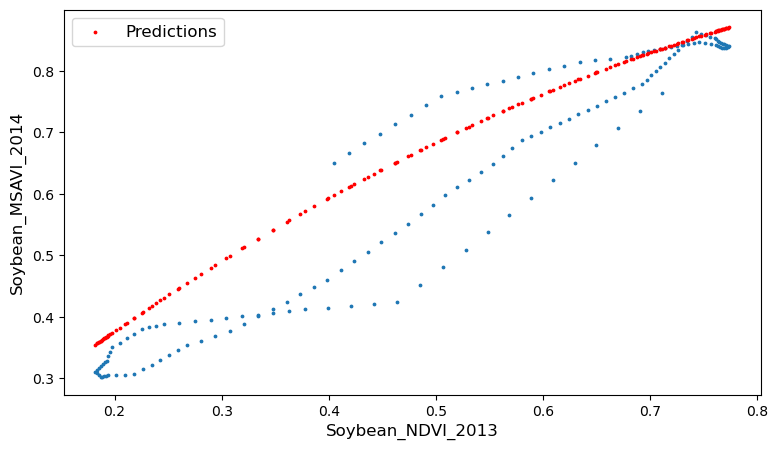

In [23]:
plt.figure(1,figsize=(9, 5))
plt.scatter(x, y, s = 3)
plt.scatter(x, y_hat, s = 3, color='red',label="Predictions")
plt.legend(loc="upper right", fontsize=12)
plt.xlabel('Corn_NDVI_2013', fontsize=12)
plt.ylabel('Corn_MSAVI_2014', fontsize=12)

plt.figure(2,figsize=(9, 5))
plt.scatter(x2, y2, s = 3)
plt.scatter(x2, y_hat2, s = 3, color='red',label="Predictions")
plt.legend(loc="upper left", fontsize=12)
plt.xlabel('Cotton_NDVI_2013', fontsize=12)
plt.ylabel('Cotton_MSAVI_2014', fontsize=12)

plt.figure(3,figsize=(9, 5))
plt.scatter(x3, y3, s = 3)
plt.scatter(x3, y_hat3, s = 3, color='red',label="Predictions")
plt.legend(loc="upper left", fontsize=12)
plt.xlabel('Soybean_NDVI_2013', fontsize=12)
plt.ylabel('Soybean_MSAVI_2014', fontsize=12)